In [ ]:
!pip install umap

In [ ]:
import pandas as pd
import numpy as np
import requests
import re
from statistics import mean, median
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import DBSCAN, KMeans, SpectralClustering, Birch
import umap

In [ ]:
df = pd.concat([pd.read_csv('X.csv', index_col = 'Unnamed: 0'), pd.read_csv('y.csv')], axis = 1)
df_new = pd.concat([pd.read_csv('X_new.csv', index_col = 'Unnamed: 0'), pd.read_csv('y_new.csv').drop(['SMILES', 'wavelength_added'], axis = 1)], axis = 1)

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=10)
Y_sklearn = sklearn_pca.fit_transform(df)

sklearn_pca.explained_variance_ratio_

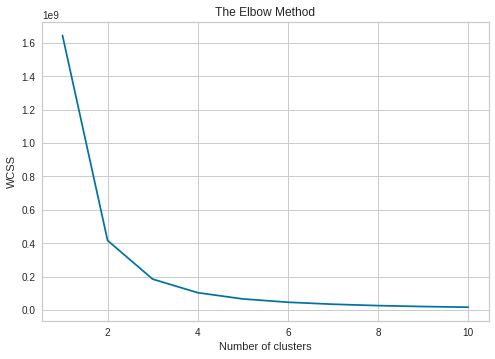

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

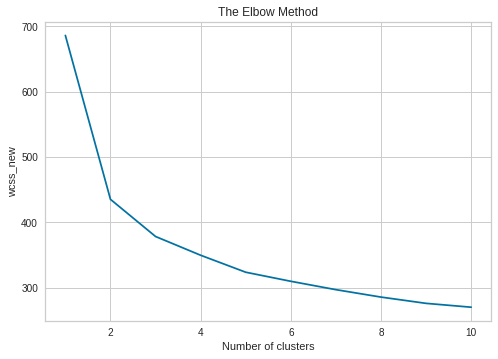

In [ ]:
wcss_new = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_new)
    wcss_new.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_new)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss_new')
plt.show()